In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I booked Premium Economy from I...
1,✅ Trip Verified | A simple story with an unfor...
2,✅ Trip Verified | Flight was delayed due to t...
3,Not Verified | Fast and friendly check in (to...
4,✅ Trip Verified | I don't understand why Brit...


In [5]:
df.to_csv("data/BA_reviews.csv")

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()

In [8]:
from nltk.tokenize import word_tokenize
df['tokenized_text'] = df['reviews'].apply(word_tokenize) 

In [9]:
df

,reviews,tokenized_text
0,Not Verified | I booked Premium Economy from I...,"[Not, Verified, |, I, booked, Premium, Economy..."
1,✅ Trip Verified | A simple story with an unfor...,"[✅, Trip, Verified, |, A, simple, story, with,..."
2,✅ Trip Verified | Flight was delayed due to t...,"[✅, Trip, Verified, |, Flight, was, delayed, d..."
3,Not Verified | Fast and friendly check in (to...,"[Not, Verified, |, Fast, and, friendly, check,..."
4,✅ Trip Verified | I don't understand why Brit...,"[✅, Trip, Verified, |, I, do, n't, understand,..."
...,...,...
995,✅ Trip Verified | Berlin to London. It was a ...,"[✅, Trip, Verified, |, Berlin, to, London, ., ..."
996,✅ Trip Verified | British Airways is my favor...,"[✅, Trip, Verified, |, British, Airways, is, m..."
997,✅ Trip Verified | Rome to Newark via London. ...,"[✅, Trip, Verified, |, Rome, to, Newark, via, ..."
998,✅ Trip Verified | London Heathrow to New York...,"[✅, Trip, Verified, |, London, Heathrow, to, N..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews         1000 non-null   object
 1   tokenized_text  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [11]:
df['tokenized_text'] = df['reviews'].str.replace('✅ Trip Verified |', '').astype("object")
df['tokenized_text'] = df['tokenized_text'].str.replace('Not Verified |', '').astype("object")
df['tokenized_text'] = df['tokenized_text'].str.replace('[^a-zA-Z0-9]', ' ').astype("object")
df

C:\Users\vaish\AppData\Local\Temp\ipykernel_15920\249481361.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tokenized_text'] = df['reviews'].str.replace('✅ Trip Verified |', '').astype("object")
C:\Users\vaish\AppData\Local\Temp\ipykernel_15920\249481361.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tokenized_text'] = df['tokenized_text'].str.replace('Not Verified |', '').astype("object")
C:\Users\vaish\AppData\Local\Temp\ipykernel_15920\249481361.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tokenized_text'] = df['tokenized_text'].str.replace('[^a-zA-Z0-9]', ' ').astype("object")


,reviews,tokenized_text
0,Not Verified | I booked Premium Economy from I...,I booked Premium Economy from INV to LAX vi...
1,✅ Trip Verified | A simple story with an unfor...,A simple story with an unfortunate outcome t...
2,✅ Trip Verified | Flight was delayed due to t...,Flight was delayed due to the inbound fligh...
3,Not Verified | Fast and friendly check in (to...,Fast and friendly check in total contrast ...
4,✅ Trip Verified | I don't understand why Brit...,I don t understand why British Airways is c...
...,...,...
995,✅ Trip Verified | Berlin to London. It was a ...,Berlin to London It was a connecting fligh...
996,✅ Trip Verified | British Airways is my favor...,British Airways is my favorite airline Boe...
997,✅ Trip Verified | Rome to Newark via London. ...,Rome to Newark via London The first sector...
998,✅ Trip Verified | London Heathrow to New York...,London Heathrow to New York JFK The First ...


In [12]:
stop_words = set(stopwords.words('english'))
specific_stopwords=str(stop_words) + 'ba'+ 'british'+ 'airway'+ 'airways'+ 'airline'+ 'airlines' +'review'+'airport'+ 'also' 

In [13]:
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review = re.sub(re.compile('#:_\!/<.*?>'), '', review)  
  review =  re.sub('[^A-Za-z0-9\n\s]+', ' ', review)  
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in specific_stopwords and word not in specific_stopwords and len(word) > 3] #removing stop words

  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review
     

In [14]:
df['tokenized_text'] = df['tokenized_text'].apply(lambda review: data_preprocessing(review))
df.head()

,reviews,tokenized_text
0,Not Verified | I booked Premium Economy from I...,booked premium economy notified cancelled flig...
1,✅ Trip Verified | A simple story with an unfor...,simple story unfortunate outcome really happen...
2,✅ Trip Verified | Flight was delayed due to t...,flight delayed inbound flight arriving late an...
3,Not Verified | Fast and friendly check in (to...,fast friendly check total contrast gatwick con...
4,✅ Trip Verified | I don't understand why Brit...,understand classified star service really medi...


In [15]:
from nltk.sentiment import vader
from collections import Counter
import collections as collect

In [16]:
def WordFreq(df_column, num_words):
    results = Counter()

    df_column.str.lower().str.split().apply(results.update)

    df_word_count = pd.DataFrame(results.most_common(num_words), columns = ['words', 'count'])

    return df_word_count
     

In [17]:
ReviewsFrequency = WordFreq(df['tokenized_text'],20)
ReviewsFrequency

,words,count
0,flight,2109
1,seat,923
2,service,745
3,time,604
4,london,599
5,hour,536
6,food,467
7,crew,465
8,good,419
9,class,407


In [18]:
from PIL import Image
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Used Words in the Reviews')

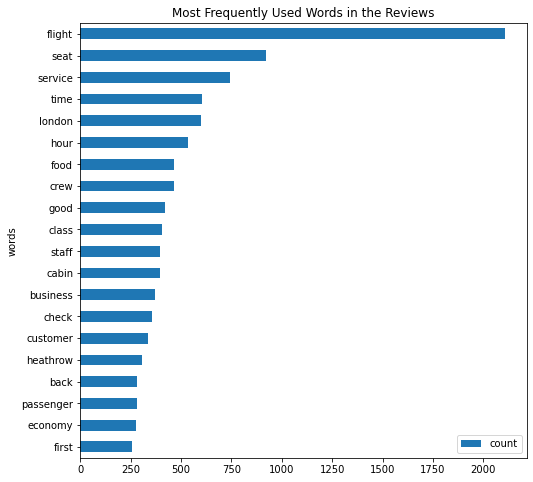

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ReviewsFrequency.sort_values(by='count').plot.barh(x='words',y='count',ax=ax)

ax.set_title("Most Frequently Used Words in the Reviews")


In [20]:
#!pip install WordCloud

In [21]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

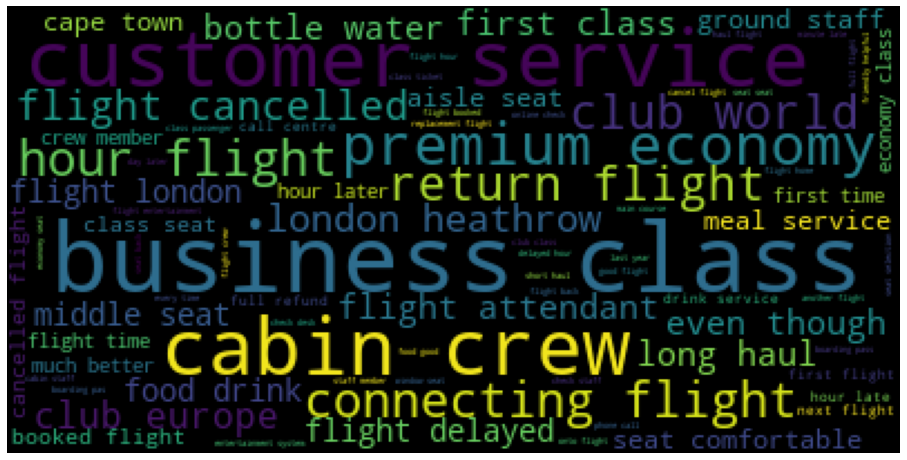

In [22]:
tplot = ''
for cat in df['tokenized_text']:
    cat = str(cat)
    tokens = cat.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tplot += " ".join(tokens)

word_cloud = WordCloud(collocations = False, width=1440, height = 900, background_color = 'white').generate(tplot)


plt.figure(figsize=(16, 16), facecolor = None)
plt.imshow(WordCloud().generate(tplot))
plt.axis('off')
# plt.show()

In [23]:
#!pip install vaderSentiment

In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['tokenized_text'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,tokenized_text,Sentiment,Analysis
0,Not Verified | I booked Premium Economy from I...,booked premium economy notified cancelled flig...,-0.7269,Negative
1,✅ Trip Verified | A simple story with an unfor...,simple story unfortunate outcome really happen...,0.8107,Positive
2,✅ Trip Verified | Flight was delayed due to t...,flight delayed inbound flight arriving late an...,-0.2732,Negative
3,Not Verified | Fast and friendly check in (to...,fast friendly check total contrast gatwick con...,0.9781,Positive
4,✅ Trip Verified | I don't understand why Brit...,understand classified star service really medi...,0.9168,Positive


In [25]:
counts = df['Analysis'].value_counts()
counts

Positive    505
Negative    389
Neutral     106
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x17e4dc70250>,
 [Text(-0.01727803256672635, 1.0998642959886566, 'Positive'),
  Text(-0.34320366236543304, -1.0450891091858885, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(-0.009424381400032553, 0.5999259796301762, '50.5%'),
  Text(-0.18720199765387255, -0.5700486050104846, '38.9%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

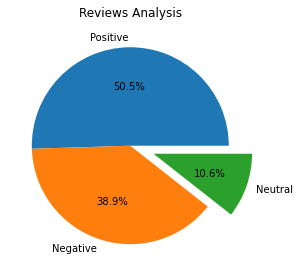

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(counts.values, labels = counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

It can be seen that 50% of reviews are positive and the most repeated words are cabin-crew, seat, service which can show that most of the reviews were based on customer service